In [1]:
"""***************************** 1st April'23 Assignment *****************************"""

"***************************** 1st April'23 Assignment *****************************"

# Logistic Regression-1

#### Q1. Explain the difference between linear regression and logistic regression models. Provide an example of a scenario where logistic regression would be more appropriate.

#### Ans.
Linear regression and logistic regression are both popular techniques used in statistical modeling, but they differ in their purpose and the type of data they handle.

Linear regression is used when the target variable (the variable we want to predict) is continuous and assumes a linear relationship with the independent variables (the variables used to make predictions). It aims to find a linear equation that best fits the data and predicts the continuous outcome. The output of linear regression is a numerical value, typically a predicted quantity.

For example, let's say we want to predict the price of a house based on its size, number of bedrooms, and location. We can use linear regression to find a linear equation that estimates the house price based on these variables.

On the other hand, logistic regression is used when the target variable is binary or categorical (with two or more classes). It models the relationship between the independent variables and the probability of a specific outcome occurring. Logistic regression uses a logistic or sigmoid function to transform the linear combination of the independent variables into a probability value between 0 and 1. It predicts the likelihood of an event or the probability of belonging to a particular class.

An example scenario where logistic regression would be more appropriate is predicting whether a customer will churn (cancel their subscription) or not. Here, the target variable is binary (churn or not churn), and the independent variables could be customer demographics, usage patterns, and other relevant factors. Logistic regression can be used to estimate the probability of churn based on these variables and classify customers into high or low churn probability groups.

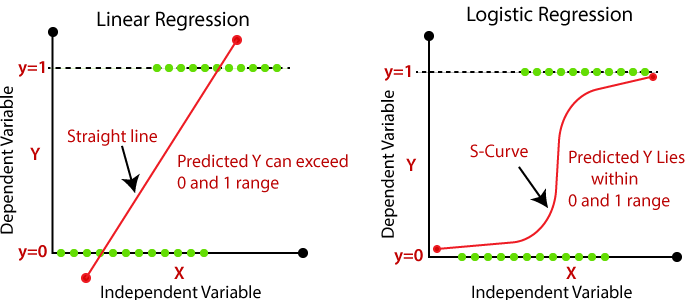

#### Q2. What is the cost function used in logistic regression, and how is it optimized?

#### Ans.
In logistic regression, the cost function used is called the "logistic loss" or "binary cross-entropy" loss. The goal of logistic regression is to minimize this cost function to find the optimal parameters for the model.

The logistic loss function is defined as:

   ***J(θ) = - [y * log(hθ(x)) + (1 - y) * log(1 - hθ(x))]***

   Where:

   - J(θ) is the cost function.
   - θ represents the parameters of the logistic regression model.
   - hθ(x) is the sigmoid function that maps the linear combination of the input features x and the model parameters θ to a probability between 0 and 1.
   - y is the true binary label of the training example.
   
The cost function penalizes the model when it makes predictions that deviate from the true labels. When y = 1, the first term -y * log(hθ(x)) becomes important and penalizes the model for predicting a low probability when the true label is positive. Similarly, when y = 0, the second term -(1 - y) * log(1 - hθ(x)) becomes significant and penalizes the model for predicting a high probability when the true label is negative.

To optimize the cost function and find the optimal parameters θ, gradient descent or other optimization algorithms are commonly used. Gradient descent iteratively updates the parameters by taking steps in the direction of steepest descent of the cost function. The algorithm calculates the gradient of the cost function with respect to each parameter and adjusts the parameters proportionally to the gradient's negative value.

The update equation for gradient descent in logistic regression is:

   ***θ := θ - α * ∇J(θ)***

   Where:

   - α is the learning rate, determining the step size in each iteration.
   - ∇J(θ) is the gradient vector of the cost function J(θ) with respect to θ.
   
   
The process continues until the algorithm converges and finds the parameters that minimize the cost function, producing the best-fitting logistic regression model for the given data.

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)

# define the multinomial logistic regression model For multiclass classification
model = LogisticRegression(multi_class='ovr', solver='lbfgs')
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# trianing model
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
model.predict_proba(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[56 10 17]
 [16 41  6]
 [ 3 13 38]]
0.675
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        83
           1       0.64      0.65      0.65        63
           2       0.62      0.70      0.66        54

    accuracy                           0.68       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.68      0.68      0.68       200



#### Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

#### Ans.
Regularization in logistic regression is a technique used to prevent overfitting, which occurs when the model fits the training data too closely and fails to generalize well to new, unseen data. Overfitting often leads to poor performance on the test or validation data.

The idea behind regularization is to introduce a penalty term to the cost function that discourages complex or over-parameterized models. The two most common regularization techniques used in logistic regression are L1 regularization (Lasso) and L2 regularization (Ridge).

L1 regularization adds the absolute values of the model's coefficients to the cost function, while L2 regularization adds the squared values of the coefficients. The regularization term is multiplied by a regularization parameter, usually denoted as λ (lambda), which controls the strength of regularization.

The regularized cost function in logistic regression is given by:

   ***J(θ) = - [y * log(hθ(x)) + (1 - y) * log(1 - hθ(x))] + λ * R(θ)***

   Where:

   - J(θ) is the regularized cost function.
   - θ represents the model parameters.
   - hθ(x) is the sigmoid function.
   - y is the true binary label of the training example.
   - λ is the regularization parameter.
   - R(θ) is the regularization term.

Regularization helps prevent overfitting in logistic regression by adding a penalty to the cost function for large parameter values. This encourages the model to find a balance between fitting the training data and avoiding overly complex models. By increasing the regularization strength (larger λ), the model tends to reduce the impact of individual features and avoid overemphasizing noise or irrelevant features.

Regularization helps in several ways:

1. Feature selection: L1 regularization can drive some of the coefficients to exactly zero, effectively performing feature selection. This can be useful in situations where there are many features, and some of them may not contribute significantly to the prediction.

2. Reducing overfitting: By penalizing large coefficients, regularization discourages complex models that are prone to overfitting. It helps in reducing the model's sensitivity to noisy or irrelevant features, leading to improved generalization on unseen data.

3. Improving model stability: Regularization can enhance the stability and robustness of the model by reducing the variance in the parameter estimates. This makes the model less sensitive to small changes in the training data.

#### Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression model?

#### Ans.
The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model, such as logistic regression. It illustrates the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at various classification thresholds.

The ROC curve is created by plotting the TPR (also known as sensitivity or recall) on the y-axis against the FPR (1 - specificity) on the x-axis. Each point on the curve represents a different classification threshold used to determine the predicted class probabilities. The threshold controls the balance between identifying true positives and accepting false positives.

To generate an ROC curve for a logistic regression model, the following steps are typically performed:

1. Train the logistic regression model using a training dataset.
2. Obtain the predicted probabilities for the positive class (e.g., class 1) from the model.
3. Vary the classification threshold from 0 to 1.
4. For each threshold, calculate the TPR and FPR based on the predicted probabilities and the true labels of the validation or test dataset.
5. Plot the TPR against the FPR for each threshold, resulting in the ROC curve.

The ROC curve provides valuable insights into the model's performance. It helps evaluate the trade-off between sensitivity and specificity and allows you to choose an appropriate classification threshold based on your specific needs.

A good classifier will have an ROC curve that is close to the top-left corner of the plot, indicating high TPR (sensitivity) and low FPR. The closer the curve is to the 45-degree diagonal line connecting the bottom-left to the top-right corners, the poorer the model's performance, as it suggests that the model's predictions are no better than random guessing.

The area under the ROC curve (AUC-ROC) is a commonly used metric to summarize the overall performance of a logistic regression model. AUC-ROC ranges from 0 to 1, with a higher value indicating better discrimination between the positive and negative classes. An AUC-ROC of 0.5 suggests a random classifier, while an AUC-ROC of 1 represents a perfect classifier.

ROC AUC Score : 0.9253

--------------------------------------------------------



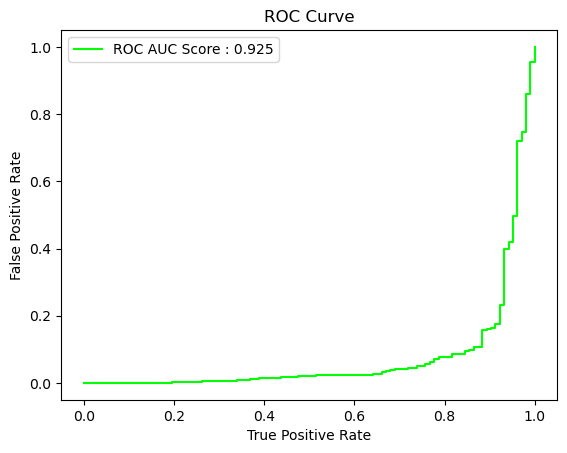

In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Fit logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

# Predict probabilities for test set
probs = clf.predict_proba(X)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y, probs)

# Calculate AUC
auc = roc_auc_score(y, probs)
print('ROC AUC Score : %.4f' % auc)

print('\n--------------------------------------------------------\n')

# Plot ROC curve
plt.plot(tpr,fpr, label=f"ROC AUC Score : {auc:.3f}",color = '#00FF00')
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Q5. What are some common techniques for feature selection in logistic regression? How do these techniques help improve the model's performance?

#### Ans.
Feature selection techniques in logistic regression aim to identify and select the most relevant and informative features to improve the model's performance. These techniques help reduce overfitting, improve interpretability, and enhance the efficiency of the model by eliminating irrelevant or redundant features. Here are some common feature selection techniques used in logistic regression:

- Univariate Feature Selection: This technique evaluates each feature independently by measuring its relationship with the target variable. Common statistical tests such as chi-square test, t-test, or ANOVA are used to assess the statistical significance of each feature. Features that show a strong correlation or significant association with the target variable are selected.

- Recursive Feature Elimination (RFE): RFE is an iterative method that recursively eliminates features from the model based on their importance. It starts with all features and trains the model, and then ranks the features based on their coefficients or importance scores. The least important feature(s) are removed, and the process is repeated until a predefined number of features is reached. RFE helps identify the most important features by considering their contribution in a stepwise manner.

- L1 Regularization (Lasso): L1 regularization in logistic regression can drive some of the coefficients to exactly zero, effectively performing feature selection. The regularization term encourages sparsity in the model by shrinking less important coefficients towards zero, resulting in automatic feature selection. Features with non-zero coefficients are considered relevant and retained in the model.

- Information Gain or Mutual Information: These techniques measure the information gain or mutual information between each feature and the target variable. They quantify the amount of information a feature provides about the target class. Features with higher information gain or mutual information are considered more informative and selected for the model.

- Correlation Analysis: Correlation analysis helps identify features that are highly correlated with the target variable or with each other. Highly correlated features may introduce multicollinearity, which can adversely affect the model's performance. By selecting only one representative feature from a highly correlated set, we can improve model efficiency and reduce redundancy.

- Embedded Methods: Embedded methods incorporate feature selection within the model training process. Techniques like L1 regularization (as mentioned earlier), decision tree-based feature importances, or gradient boosting algorithms can assess feature importance during model training. Features with higher importance scores are considered more relevant and retained.

#### Q6. How can you handle imbalanced datasets in logistic regression? What are some strategies for dealing with class imbalance?

#### Ans.
Handling imbalanced datasets in logistic regression is crucial because when one class dominates the other, the model may be biased towards the majority class and perform poorly on the minority class. Here are some strategies for dealing with class imbalance in logistic regression:

1. Resampling Techniques:

- -  Undersampling: Randomly removing samples from the majority class to match the number of samples in the minority class. This can help balance the class distribution but may result in loss of information.
- - Oversampling: Duplicating or generating new synthetic samples in the minority class to increase its representation. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples based on feature interpolation.
- -  Hybrid Approaches: Combining undersampling and oversampling methods to balance the class distribution effectively.

2. Class Weighting:

- - Assigning higher weights to the minority class during model training. This gives more importance to the minority class in the cost function, helping the model better capture its patterns.
- - Class weights can be set inversely proportional to the class frequencies or using more sophisticated methods like the balanced class weight approach.

3. Threshold Adjustment:

- - Since logistic regression models produce probability outputs, adjusting the classification threshold can improve the prediction balance.
- - By lowering the threshold, the model can predict more positive instances, which may help in capturing the minority class more effectively. However, this may increase the number of false positives.

4. Ensemble Methods:

- - Ensemble techniques like bagging or boosting can be used to combine multiple logistic regression models trained on different subsets of the data. This can help improve the overall performance and handle class imbalance.

5. Evaluation Metrics:

- - Instead of relying solely on accuracy, consider using evaluation metrics that are more suitable for imbalanced datasets, such as precision, recall, F1 score, or area under the Precision-Recall curve (AUC-PR). These metrics provide a more comprehensive understanding of the model's performance on both classes.

6. Data Augmentation:

- - For datasets with limited samples in the minority class, data augmentation techniques can be employed to generate new samples by applying transformations or perturbations to the existing data. This can help increase the representation of the minority class.

It's important to note that the choice of strategy depends on the specific dataset and problem at hand. Experimentation and careful evaluation of different techniques are necessary to find the most effective approach for handling class imbalance in logistic regression.

#### Q7. Can you discuss some common issues and challenges that may arise when implementing logistic regression, and how they can be addressed? For example, what can be done if there is multicollinearity among the independent variables?

#### Ans.


Accuracy: 0.867
ROC AUC Score : 0.932

------------------------



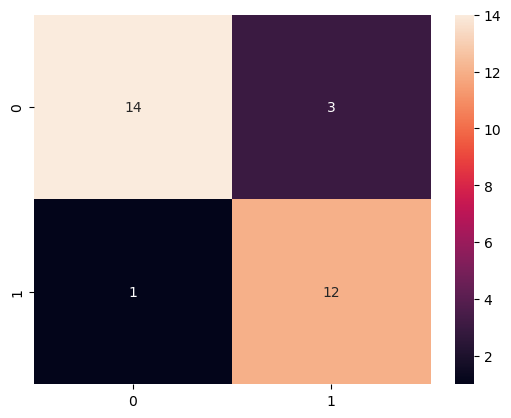

In [12]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Generate a binary classification dataset with 1000 samples
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=100)

# Use PCA to reduce the dimensionality of the data and account for collinearity
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=30, random_state=100)

# Train a logistic regression model on the training set
clf = LogisticRegression(random_state=42,max_iter=1000)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,-1]

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred_prob)
print(f"Accuracy: {acc:.3f}")
print(f'ROC AUC Score : {roc:.3f}')
      
print('\n------------------------\n')
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)
plt.show()